In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
df = pd.read_csv('./Crimes_2011_to_present.csv', index_col=False, error_bad_lines=False, engine='python')

In [3]:
df.head(5)

,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
0,10060004,HY248774,2015-05-05,010XX W 79TH ST,0460,BATTERY,SIMPLE,SIDEWALK,false,false,...,17,71,08B,1170778.0,1852475,2015.0,05/12/2015 12:42:01 PM,41.75066697,-87.649760051,(41.75066697
1,10059982,HY248801,2015-05-05,105XX S WABASH AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,...,9,49,04B,1178485.0,1834909,2015.0,05/12/2015 12:42:01 PM,41.702292131,-87.622049984,(41.702292131
2,10059953,HY248791,2015-05-05,005XX N ASHLAND AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,...,26,24,18,1165594.0,1903713,2015.0,05/12/2015 12:42:01 PM,41.891381064,-87.66730127,(41.891381064
3,10060015,HY248790,2015-05-05,005XX N MARSHFIELD AVE,0275,CRIM SEXUAL ASSAULT,ATTEMPT AGG: OTHER,ALLEY,false,false,...,26,24,02,1165337.0,1903842,2015.0,05/12/2015 12:42:01 PM,41.89174052,-87.668241434,(41.89174052
4,10059944,HY248782,2015-05-05,0000X E 72ND ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,true,false,...,6,69,18,1178073.0,1857256,2015.0,05/12/2015 12:42:01 PM,41.763624424,-87.622883163,(41.763624424


In [4]:
df.drop('Location', axis=1, inplace=True)

In [5]:
df.head(3)

,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,District,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude
0,10060004,HY248774,2015-05-05,010XX W 79TH ST,0460,BATTERY,SIMPLE,SIDEWALK,false,false,...,6,17,71,08B,1170778.0,1852475,2015.0,05/12/2015 12:42:01 PM,41.75066697,-87.649760051
1,10059982,HY248801,2015-05-05,105XX S WABASH AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,...,5,9,49,04B,1178485.0,1834909,2015.0,05/12/2015 12:42:01 PM,41.702292131,-87.622049984
2,10059953,HY248791,2015-05-05,005XX N ASHLAND AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,...,13,26,24,18,1165594.0,1903713,2015.0,05/12/2015 12:42:01 PM,41.891381064,-87.66730127


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346119 entries, 0 to 1346118
Data columns (total 21 columns):
ID                      1346119 non-null int64
Case.Number             1346119 non-null object
Date                    1346119 non-null object
Block                   1346119 non-null object
IUCR                    1346119 non-null object
Primary.Type            1346119 non-null object
Description             1346119 non-null object
Location.Description    1345323 non-null object
Arrest                  1346119 non-null object
Domestic                1346119 non-null object
Beat                    1346119 non-null object
District                1339455 non-null object
Ward                    1346088 non-null object
Community.Area          1345704 non-null object
FBI.Code                1346119 non-null object
X.Coordinate            1339480 non-null float64
Y.Coordinate            1339496 non-null object
Year                    1345983 non-null float64
Updated.On            

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346119 entries, 0 to 1346118
Data columns (total 21 columns):
ID                      1346119 non-null int64
Case.Number             1346119 non-null object
Date                    1346119 non-null datetime64[ns]
Block                   1346119 non-null object
IUCR                    1346119 non-null object
Primary.Type            1346119 non-null object
Description             1346119 non-null object
Location.Description    1345323 non-null object
Arrest                  1346119 non-null object
Domestic                1346119 non-null object
Beat                    1346119 non-null object
District                1339455 non-null object
Ward                    1346088 non-null object
Community.Area          1345704 non-null object
FBI.Code                1346119 non-null object
X.Coordinate            1339480 non-null float64
Y.Coordinate            1339496 non-null object
Year                    1345983 non-null float64
Updated.On    

In [6]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [97]:
df.head(3)

,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Month
0,10060004,HY248774,2015-05-05,010XX W 79TH ST,0460,BATTERY,SIMPLE,SIDEWALK,false,false,...,17,71,08B,1170778.0,1852475,2015,05/12/2015 12:42:01 PM,41.75066697,-87.649760051,5
1,10059982,HY248801,2015-05-05,105XX S WABASH AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,...,9,49,04B,1178485.0,1834909,2015,05/12/2015 12:42:01 PM,41.702292131,-87.622049984,5
2,10059953,HY248791,2015-05-05,005XX N ASHLAND AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,...,26,24,18,1165594.0,1903713,2015,05/12/2015 12:42:01 PM,41.891381064,-87.66730127,5


In [98]:
# Count Crimes by Year and Month
df.groupby(['Year', 'Month']).count().transpose()

Year                   2011                                                   \
Month                    1      2      3      4      5      6      7      8    
ID                    27077  22196  28655  29063  31550  32261  33216  32548   
Case.Number           27077  22196  28655  29063  31550  32261  33216  32548   
Date                  27077  22196  28655  29063  31550  32261  33216  32548   
Block                 27077  22196  28655  29063  31550  32261  33216  32548   
IUCR                  27077  22196  28655  29063  31550  32261  33216  32548   
Primary.Type          27077  22196  28655  29063  31550  32261  33216  32548   
Description           27077  22196  28655  29063  31550  32261  33216  32548   
Location.Description  27070  22185  28639  29050  31536  32237  33195  32523   
Arrest                27077  22196  28655  29063  31550  32261  33216  32548   
Domestic              27077  22196  28655  29063  31550  32261  33216  32548   
Beat                  27077  22196  28655  29063  31550  32261  33216  32548   
District              27011  22167  28632  29043  31517  32228  33195  32510   
Ward                  27075  22195  28655  29061  31549  32260  33215  32543   
Community.Area        27070  22184  28644  29055  31534  32238  33187  32530   
FBI.Code              27077  22196  28655  29063  31550  32261  33216  32548   
X.Coordinate          27012  22166  28632  29043  31518  32231  33197  32519   
Y.Coordinate          27015  22168  28634  29045  31519  32231  33199  32520   
Updated.On            27076  22195  28654  29063  31549  32260  33216  32548   
Latitude              27015  22168  28634  29045  31519  32231  33199  32520   
Longitude             27015  22168  28634  29045  31519  32231  33199  32520   

Year                                ...    2014                              \
Month                    9      10  ...      8      9      10     11     12   
ID                    29879  30234  ...   25645  23596  23561  20352  20546   
Case.Number           29879  30234  ...   25645  23596  23561  20352  20546   
Date                  29879  30234  ...   25645  23596  23561  20352  20546   
Block                 29879  30234  ...   25645  23596  23561  20352  20546   
IUCR                  29879  30234  ...   25645  23596  23561  20352  20546   
Primary.Type          29879  30234  ...   25645  23596  23561  20352  20546   
Description           29879  30234  ...   25645  23596  23561  20352  20546   
Location.Description  29853  30209  ...   25642  23592  23558  20350  20536   
Arrest                29879  30234  ...   25645  23596  23561  20352  20546   
Domestic              29879  30234  ...   25645  23596  23561  20352  20546   
Beat                  29879  30234  ...   25645  23596  23561  20352  20546   
District              29853  30202  ...   25311  23250  23206  20032  20245   
Ward                  29878  30234  ...   25645  23596  23560  20352  20546   
Community.Area        29866  30222  ...   25642  23583  23555  20345  20540   
FBI.Code              29879  30234  ...   25645  23596  23561  20352  20546   
X.Coordinate          29853  30202  ...   25311  23250  23206  20032  20245   
Y.Coordinate          29854  30203  ...   25311  23250  23206  20032  20245   
Updated.On            29879  30234  ...   25642  23583  23555  20345  20540   
Latitude              29854  30203  ...   25311  23250  23206  20032  20245   
Longitude             29854  30203  ...   25311  23250  23206  20032  20245   

Year                   2015                             
Month                    1      2      3      4     5   
ID                    19935  15826  20968  20739  3467  
Case.Number           19935  15826  20968  20739  3467  
Date                  19935  15826  20968  20739  3467  
Block                 19935  15826  20968  20739  3467  
IUCR                  19935  15826  20968  20739  3467  
Primary.Type          19935  15826  20968  20739  3467  
Description           19935  15826  20968  2

In [69]:
df['District'].value_counts().head(10)

11    88986
8     88055
4     77307
7     77280
6     76814
25    76601
3     67842
9     65300
12    59756
19    58894
Name: District, dtype: int64

In [8]:
dummy = pd.get_dummies(df['Primary.Type'])

In [9]:
dummy.head(3)

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = pd.concat([df, dummy])

In [11]:
df.head(3)

,ARSON,ASSAULT,Arrest,BATTERY,BURGLARY,Beat,Block,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,...,ROBBERY,SEX OFFENSE,STALKING,THEFT,Updated.On,WEAPONS VIOLATION,Ward,X.Coordinate,Y.Coordinate,Year
0,NaN,NaN,false,NaN,NaN,612,010XX W 79TH ST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,17,1170778.0,1852475,2015.0
1,NaN,NaN,false,NaN,NaN,512,105XX S WABASH AVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,9,1178485.0,1834909,2015.0
2,NaN,NaN,true,NaN,NaN,1215,005XX N ASHLAND AVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,26,1165594.0,1903713,2015.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692238 entries, 0 to 1346118
Data columns (total 55 columns):
ARSON                                float64
ASSAULT                              float64
Arrest                               object
BATTERY                              float64
BURGLARY                             float64
Beat                                 object
Block                                object
CONCEALED CARRY LICENSE VIOLATION    float64
CRIM SEXUAL ASSAULT                  float64
CRIMINAL DAMAGE                      float64
CRIMINAL TRESPASS                    float64
Case.Number                          object
Community.Area                       object
DECEPTIVE PRACTICE                   float64
Date                                 datetime64[ns]
Description                          object
District                             object
Domestic                             object
FBI.Code                             object
GAMBLING                          

In [12]:
cbi = df.groupby('Year')

In [13]:
cbi_df = cbi['ID'].count()

In [14]:
cbi_df

Year
2011.0    351256
2012.0    335359
2013.0    306169
2014.0    272400
2015.0     80935
Name: ID, dtype: int64

Text(0.5,1,'Count of Crimes per Year for the past 5 Years')

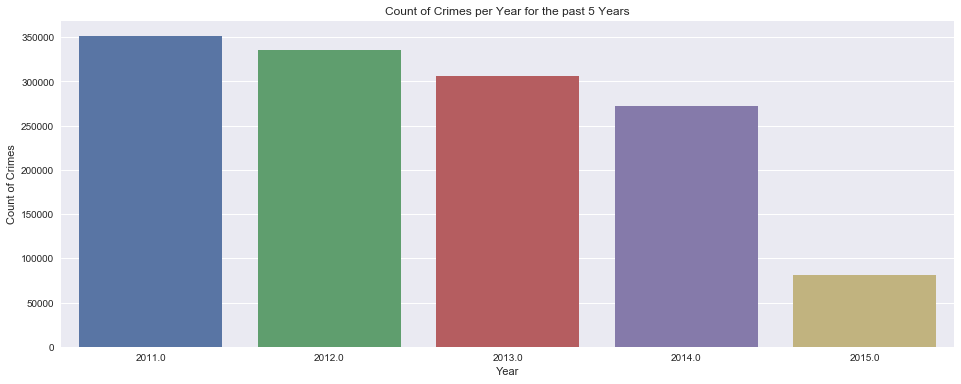

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df)
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes per Year for the past 5 Years')

### It looks like the number of Crimes has decreased continuously in the past 5 years.

### Apparently July 2011 showed a high number of crimes.

In [16]:
pvcrimes = df.pivot_table(values='ID', index='Month', columns='Year', aggfunc='count').fillna(0)

In [17]:
pvcrimes

Year,2011.0,2012.0,2013.0,2014.0,2015.0
Month,,,,,
1.0,27077.0,26131.0,25281.0,19692.0,19935.0
2.0,22196.0,23840.0,21341.0,17918.0,15826.0
3.0,28655.0,28527.0,24872.0,22051.0,20968.0
4.0,29063.0,27147.0,25459.0,22740.0,20739.0
5.0,31550.0,30040.0,27921.0,24711.0,3467.0
6.0,32261.0,31022.0,27288.0,25236.0,0.0
7.0,33216.0,31918.0,28555.0,26352.0,0.0
8.0,32548.0,29988.0,28574.0,25645.0,0.0
9.0,29879.0,27706.0,26262.0,23596.0,0.0


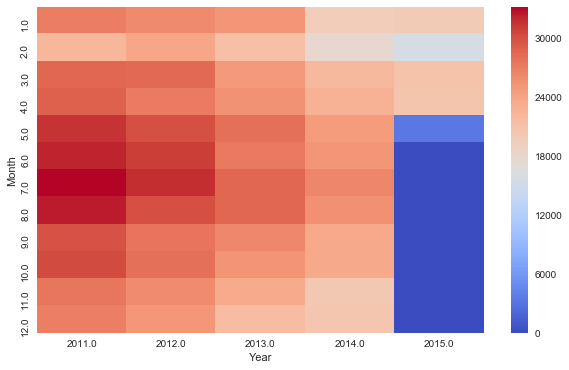

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(pvcrimes, cmap='coolwarm', linecolor='white')

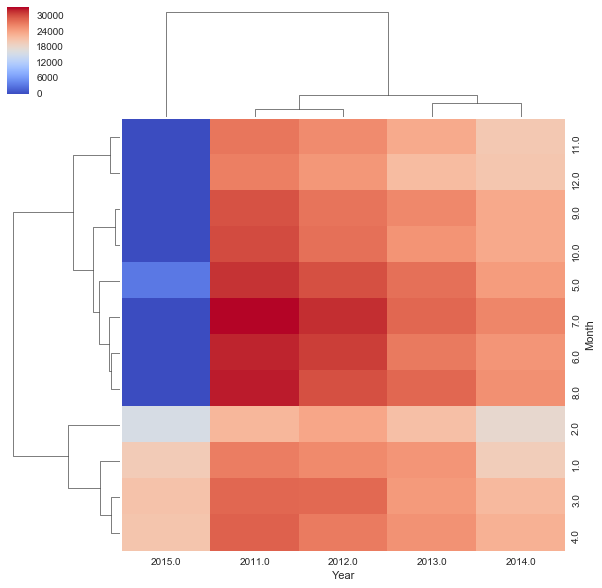

In [19]:
sns.clustermap(pvcrimes, cmap='coolwarm')

In [23]:
pvcrimesdist = df.pivot_table(values='ID', index='District', columns='Year', aggfunc='count').fillna(0)

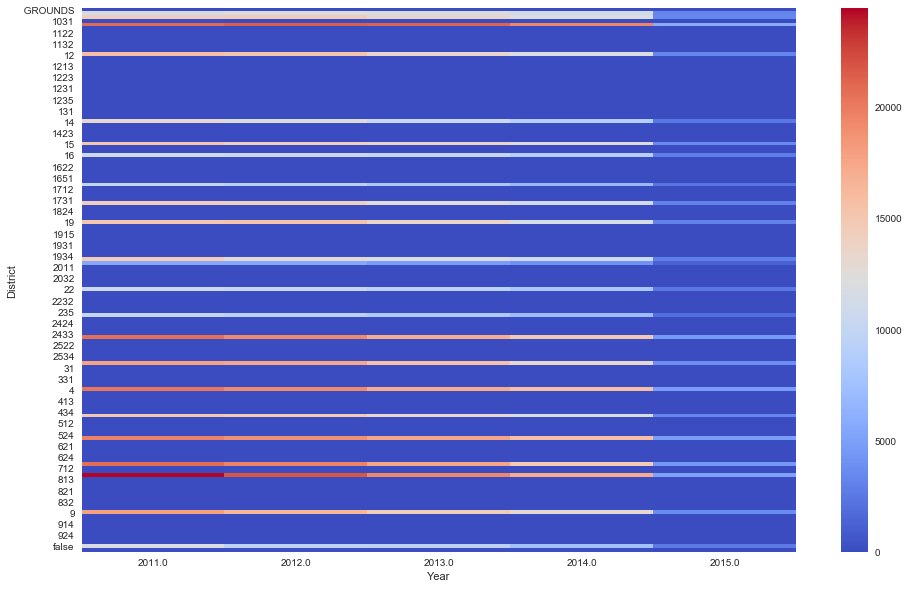

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(pvcrimesdist, cmap='coolwarm')

In [26]:
gbd = df.groupby('District')

In [35]:
gbddf = pd.DataFrame(gbd.count().transpose().loc['ID'])

In [40]:
gbddf = gbddf.reset_index()

In [60]:
gbddf['ID'].sum()

1339409

In [48]:
gbddf = gbddf.sort_values(by='ID', ascending=False).head(100)

In [50]:
gbddf[gbddf['ID']>20000]

,index,District,ID
4,4,11,88986
125,125,8,88055
102,102,4,77307
122,122,7,77280
115,115,6,76814
88,88,25,76601
95,95,3,67842
135,135,9,65300
12,12,12,59756
57,57,19,58894


### Distric 4 has the highest total crime number

## Clustering

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=3)

In [56]:
df['District'] = pd.to_numeric(df['District'], errors='coerce')

In [57]:
df = df[df['District'].notnull()]

In [58]:
kmeans.fit(df[['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION', 'District']].fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)